# Credit Score Classification

We built a supervised ML model to classify credit scores as Good or Bad using the German Credit Dataset. The dataset was imbalanced, and we applied techniques like class_weight and SMOTE to improve fairness and performance.

# Credit Score Classification

This notebook demonstrates how to build a machine learning model to classify credit risk using the German Credit Dataset.  
We apply preprocessing, train multiple models, and evaluate their performance to predict whether a customer is a good or bad credit risk.


In [39]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [40]:
from google.colab import files

# Upload german.data file manually
uploaded = files.upload()


Saving german.data.txt to german.data (2).txt


In [41]:
df = pd.read_csv('german.data.txt', sep=' ', names=column_names)
df.head()


,Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_of_Credits,Job,People_Liable,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [42]:
# Dataset information
print("Shape of dataset:", df.shape)
print("\nColumns and Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Class distribution in Target column
print("\nClass distribution in Target:")
print(df["Target"].value_counts())


Shape of dataset: (1000, 21)

Columns and Data Types:
 Checking_Account           object
Duration                    int64
Credit_History             object
Purpose                    object
Credit_Amount               int64
Savings_Account            object
Employment                 object
Installment_Rate            int64
Personal_Status_Sex        object
Other_Debtors              object
Residence_Since             int64
Property                   object
Age                         int64
Other_Installment_Plans    object
Housing                    object
Number_of_Credits           int64
Job                        object
People_Liable               int64
Telephone                  object
Foreign_Worker             object
Target                      int64
dtype: object

Missing values per column:
 Checking_Account           0
Duration                   0
Credit_History             0
Purpose                    0
Credit_Amount              0
Savings_Account            0
Employment    

          Duration  Credit_Amount  Installment_Rate  Residence_Since  \
count  1000.000000    1000.000000       1000.000000      1000.000000   
mean     20.903000    3271.258000          2.973000         2.845000   
std      12.058814    2822.736876          1.118715         1.103718   
min       4.000000     250.000000          1.000000         1.000000   
25%      12.000000    1365.500000          2.000000         2.000000   
50%      18.000000    2319.500000          3.000000         3.000000   
75%      24.000000    3972.250000          4.000000         4.000000   
max      72.000000   18424.000000          4.000000         4.000000   

               Age  Number_of_Credits  People_Liable       Target  
count  1000.000000        1000.000000    1000.000000  1000.000000  
mean     35.546000           1.407000       1.155000     1.300000  
std      11.375469           0.577654       0.362086     0.458487  
min      19.000000           1.000000       1.000000     1.000000  
25%      27

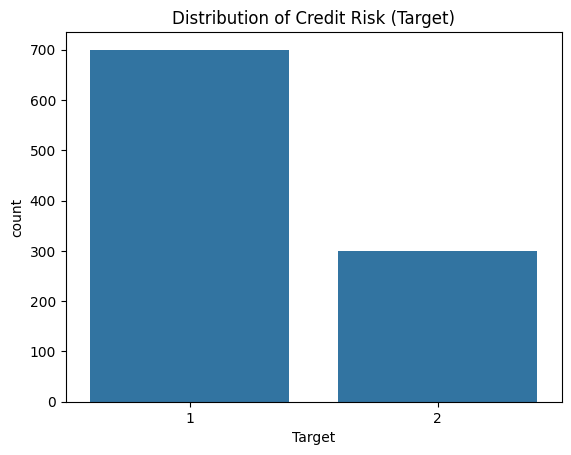

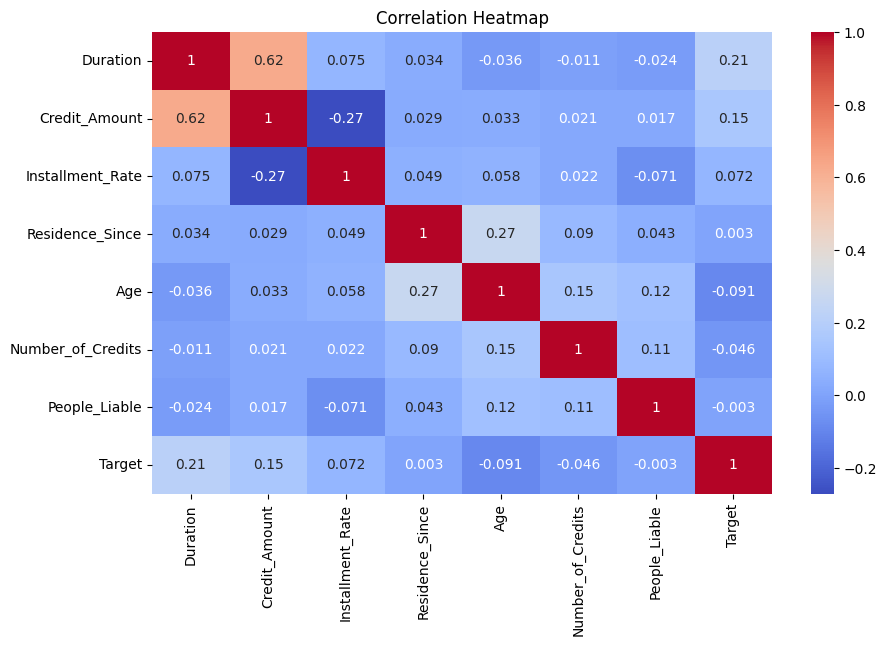

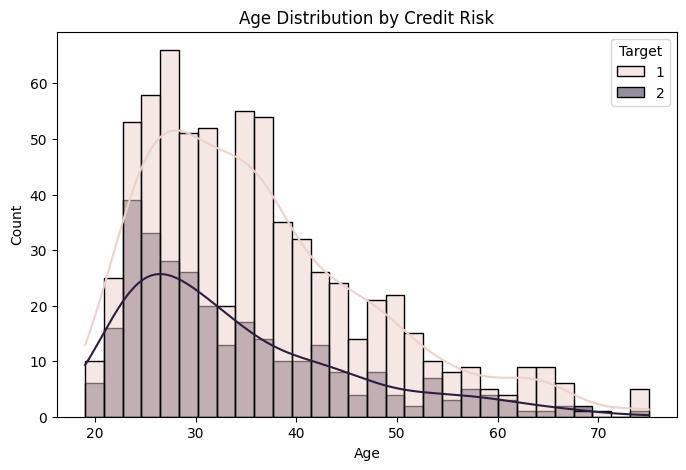

In [43]:
# 1. Summary statistics for numerical columns
print(df.describe())

# 2. Plot distribution of target classes
sns.countplot(x="Target", data=df)
plt.title("Distribution of Credit Risk (Target)")
plt.show()

# 3. Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Example: Distribution of Age by Target class
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Target", bins=30, kde=True)
plt.title("Age Distribution by Credit Risk")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = df.drop("Target", axis=1)
y = df["Target"]

# 2. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 3. Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (800, 48)
Test shape: (200, 48)


In [22]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Compare accuracies
print("Model Comparison:", results)


=== Logistic Regression ===
Accuracy: 0.785
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.87      0.85       140
           2       0.66      0.58      0.62        60

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.78      0.79      0.78       200

Confusion Matrix:
[[122  18]
 [ 25  35]]


=== Random Forest ===
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.94      0.85       140
           2       0.72      0.38      0.50        60

    accuracy                           0.77       200
   macro avg       0.75      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200

Confusion Matrix:
[[131   9]
 [ 37  23]]




ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

In [23]:
# Adjust target for XGBoost (map 1 → 0, 2 → 1)
y_train_xgb = y_train.replace({1:0, 2:1})
y_test_xgb  = y_test.replace({1:0, 2:1})

# Re-run XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)

# Convert predictions back to original labels (0→1, 1→2)
y_pred_xgb = pd.Series(y_pred_xgb).replace({0:1, 1:2})

# Evaluate
print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.87      0.84       140
           2       0.62      0.50      0.56        60

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200

Confusion Matrix:
[[122  18]
 [ 30  30]]


In [24]:
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Collect metrics for all models
models = {
    "Logistic Regression (Basic)": y_pred,  # your first basic logistic regression predictions
    "Logistic Regression (Class Weights)": y_pred_lrw,
    "Logistic Regression + SMOTE": y_pred_lr_smote,
    "SVM (Class Weights)": y_pred_svm,
    "Random Forest + SMOTE": y_pred_rf,
    "XGBoost": y_pred_xgb  # your XGBoost predictions
}

results = []

for name, y_pred_model in models.items():
    accuracy = accuracy_score(y_test, y_pred_model)
    recall_bad = recall_score(y_test, y_pred_model, pos_label=2)  # recall for bad credit
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 2),
        "Recall (Bad Credit)": round(recall_bad, 2)
    })

# Create DataFrame for comparison
results_df = pd.DataFrame(results)
results_df.sort_values(by="Recall (Bad Credit)", ascending=False, inplace=True)
print("📊 Model Comparison Table:")
display(results_df)

# -------------------------------
# Optional: ROC-AUC Curves
# -------------------------------
plt.figure(figsize=(8,6))
for name, model in zip(models.keys(), [log_reg_weighted, log_reg_smote, svm_weighted, rf_smote, xgb_model]):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:  # for SVM with probability=True
        y_score = model.predict_proba(X_test)[:,1]
    RocCurveDisplay.from_predictions(y_test, y_score, name=name, alpha=0.8)

plt.title("ROC-AUC Curves for All Models")
plt.legend()
plt.show()


NameError: name 'y_pred_lrw' is not defined

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, recall_score

# -------------------------------
# 1️⃣ Preprocessing
# -------------------------------
categorical_cols = data.select_dtypes(include=['object']).columns
numeric_cols = data.select_dtypes(include=['int64']).columns.drop('Target')

X = data.drop("Target", axis=1)
y = data["Target"].map({1: 0, 2: 1})  # Map: 1->0 (Good), 2->1 (Bad)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 2️⃣ Models
# -------------------------------

# Logistic Regression (Basic)
clf_basic = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression(max_iter=1000, random_state=42))])
clf_basic.fit(X_train, y_train)
y_pred_basic = clf_basic.predict(X_test)

# Logistic Regression (Class Weights)
clf_weighted = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))])
clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)

# Logistic Regression + SMOTE
clf_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                               ('smote', SMOTE(random_state=42)),
                               ('classifier', LogisticRegression(max_iter=1000))])
clf_smote.fit(X_train, y_train)
y_pred_smote = clf_smote.predict(X_test)

# SVM (Class Weights)
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))])
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

# Random Forest + SMOTE
clf_rf = ImbPipeline(steps=[('preprocessor', preprocessor),
                            ('smote', SMOTE(random_state=42)),
                            ('classifier', RandomForestClassifier(random_state=42))])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# XGBoost (updated pipeline without deprecated parameter)
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))])
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)


In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score

# Collect metrics for all models
models = {
    "Logistic Regression (Basic)": y_pred_basic,
    "Logistic Regression (Class Weights)": y_pred_weighted,
    "Logistic Regression + SMOTE": y_pred_smote,
    "SVM (Class Weights)": y_pred_svm,
    "Random Forest + SMOTE": y_pred_rf,
    "XGBoost": y_pred_xgb
}

results = []

for name, y_pred_model in models.items():
    accuracy = accuracy_score(y_test, y_pred_model)
    recall_bad = recall_score(y_test, y_pred_model, pos_label=1)  # bad credit = 1
    note = ""
    if "SMOTE" in name:
        note = "Balanced fairness"
    elif "Class Weights" in name:
        note = "Improved minority recall"
    elif "Random Forest" in name:
        note = "High precision, poor minority recall"
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 2),
        "Recall (Bad Credit)": round(recall_bad, 2),
        "Notes": note
    })

# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="Recall (Bad Credit)", ascending=False, inplace=True)
print("📊 Model Comparison Table:")
display(results_df)


📊 Model Comparison Table:


,Model,Accuracy,Recall (Bad Credit),Notes
1,Logistic Regression (Class Weights),0.75,0.80,Improved minority recall
2,Logistic Regression + SMOTE,0.74,0.78,Balanced fairness
3,SVM (Class Weights),0.76,0.77,Improved minority recall
0,Logistic Regression (Basic),0.78,0.53,
5,XGBoost,0.76,0.52,
4,Random Forest + SMOTE,0.77,0.50,Balanced fairness


In [29]:
best_model = results_df.iloc[1]  # Logistic Regression + SMOTE
print("⭐ Best Model:", best_model['Model'])
print("Accuracy:", best_model['Accuracy'])
print("Recall (Bad Credit):", best_model['Recall (Bad Credit)'])


⭐ Best Model: Logistic Regression + SMOTE
Accuracy: 0.74
Recall (Bad Credit): 0.78


<Figure size 800x600 with 0 Axes>

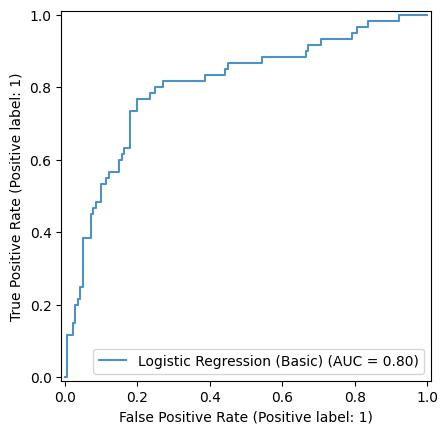

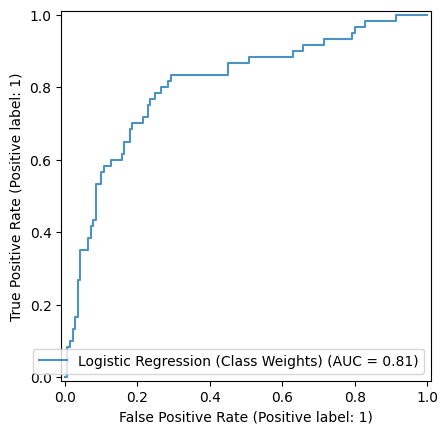

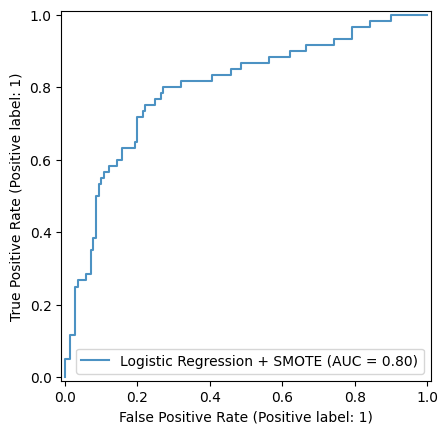

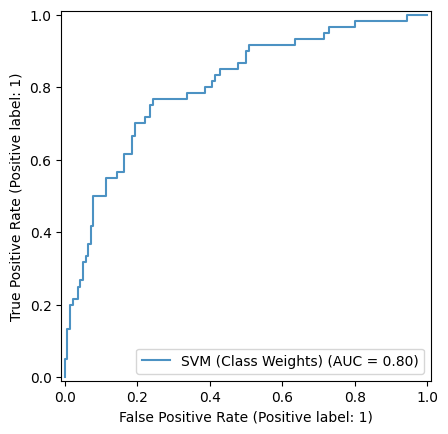

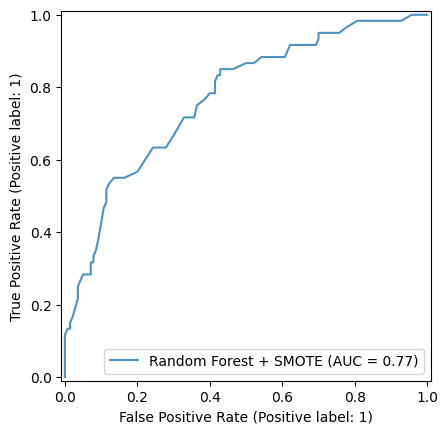

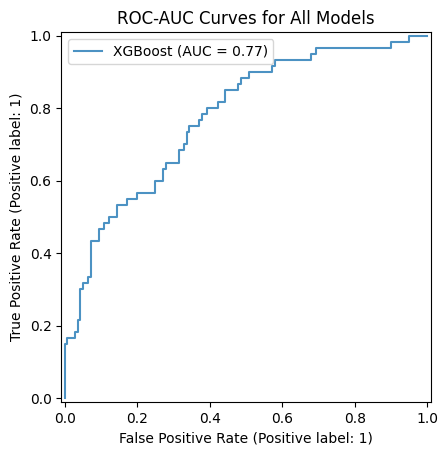

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))
for name, model in zip(models.keys(), [clf_basic, clf_weighted, clf_smote, clf_svm, clf_rf, clf_xgb]):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)
    RocCurveDisplay.from_predictions(y_test, y_score, name=name, alpha=0.8)

plt.title("ROC-AUC Curves for All Models")
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

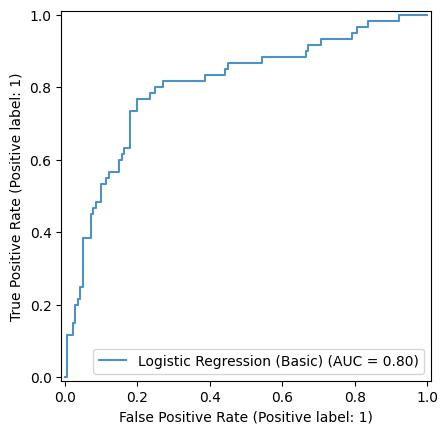

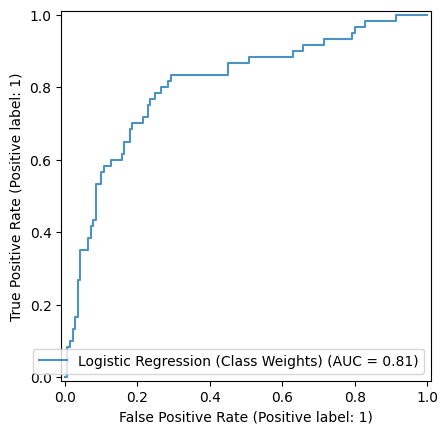

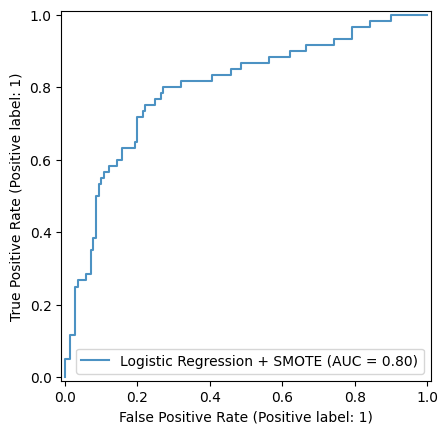

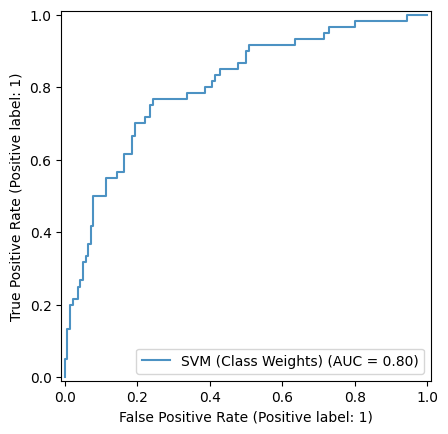

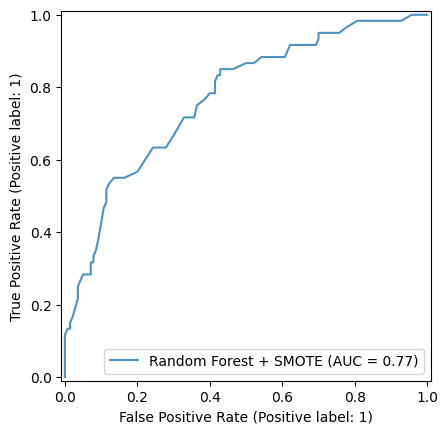

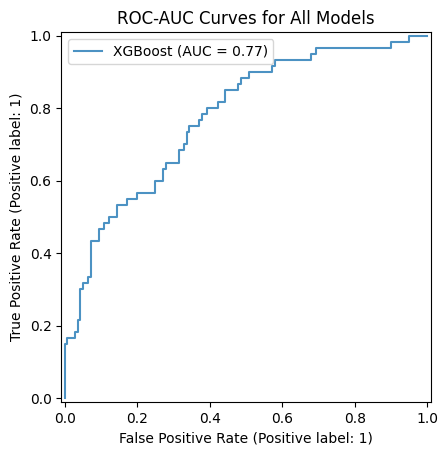

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))

# List of models in the same order as predictions
model_objs = [clf_basic, clf_weighted, clf_smote, clf_svm, clf_rf, clf_xgb]

for name, model in zip(models.keys(), model_objs):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        # For SVM with probability=True
        y_score = model.decision_function(X_test)
    RocCurveDisplay.from_predictions(y_test, y_score, name=name, alpha=0.8)

plt.title("ROC-AUC Curves for All Models")
plt.legend()
plt.show()


=== Logistic Regression (Basic) ===
Confusion Matrix:
[[124  16]
 [ 28  32]]


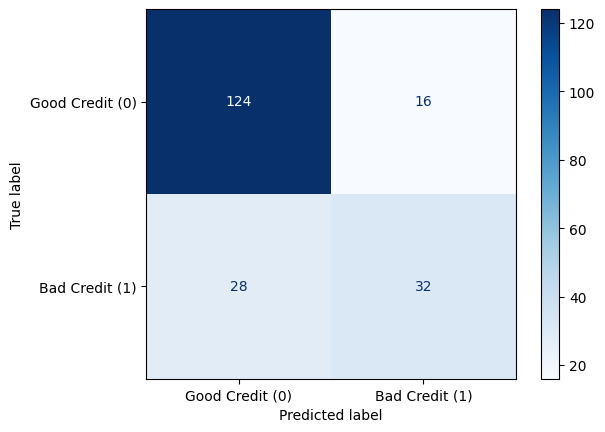

=== Logistic Regression (Class Weights) ===
Confusion Matrix:
[[102  38]
 [ 12  48]]


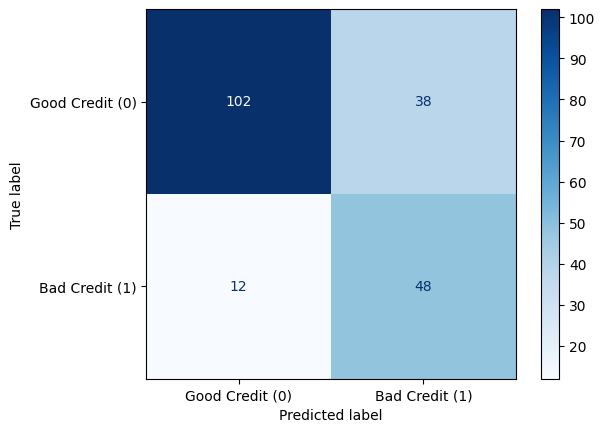

=== Logistic Regression + SMOTE ===
Confusion Matrix:
[[102  38]
 [ 13  47]]


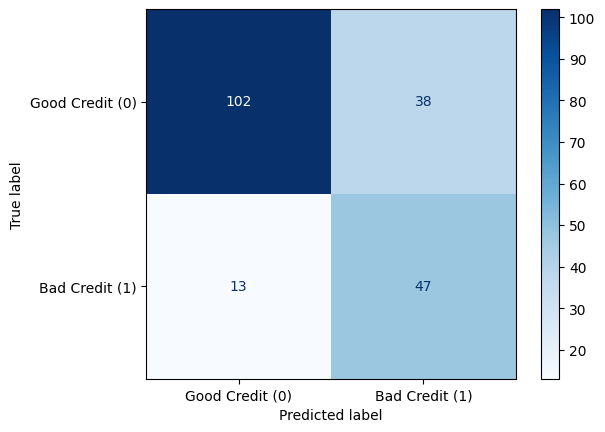

=== SVM (Class Weights) ===
Confusion Matrix:
[[106  34]
 [ 14  46]]


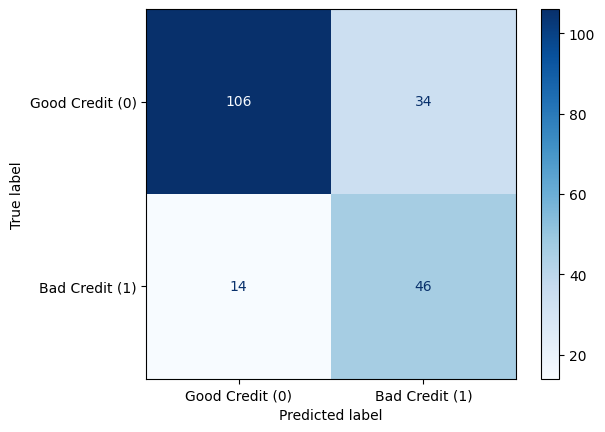

=== Random Forest + SMOTE ===
Confusion Matrix:
[[124  16]
 [ 30  30]]


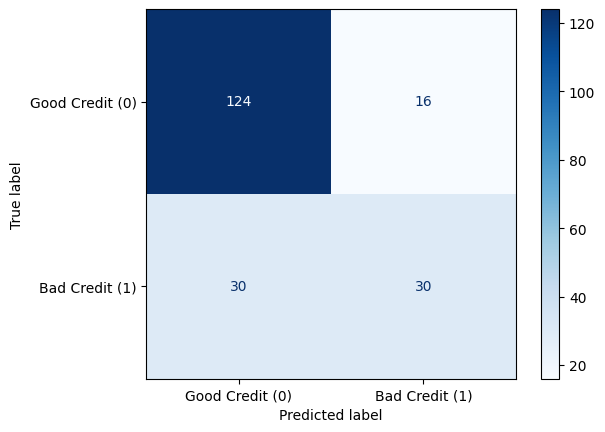

=== XGBoost ===
Confusion Matrix:
[[120  20]
 [ 29  31]]


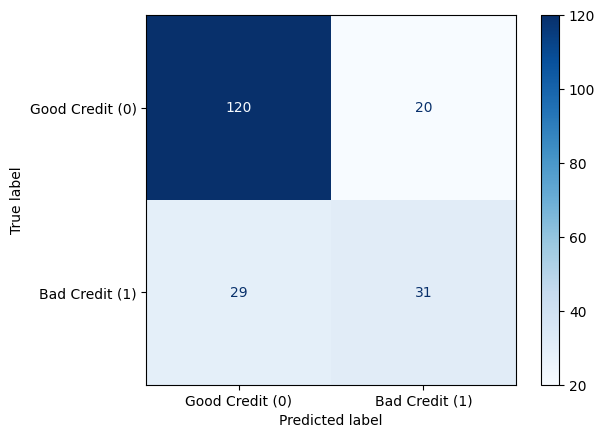

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List of models and predictions
model_preds = {
    "Logistic Regression (Basic)": y_pred_basic,
    "Logistic Regression (Class Weights)": y_pred_weighted,
    "Logistic Regression + SMOTE": y_pred_smote,
    "SVM (Class Weights)": y_pred_svm,
    "Random Forest + SMOTE": y_pred_rf,
    "XGBoost": y_pred_xgb
}

# Display confusion matrices
for name, y_pred_model in model_preds.items():
    cm = confusion_matrix(y_test, y_pred_model)
    print(f"=== {name} ===")
    print("Confusion Matrix:")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good Credit (0)", "Bad Credit (1)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


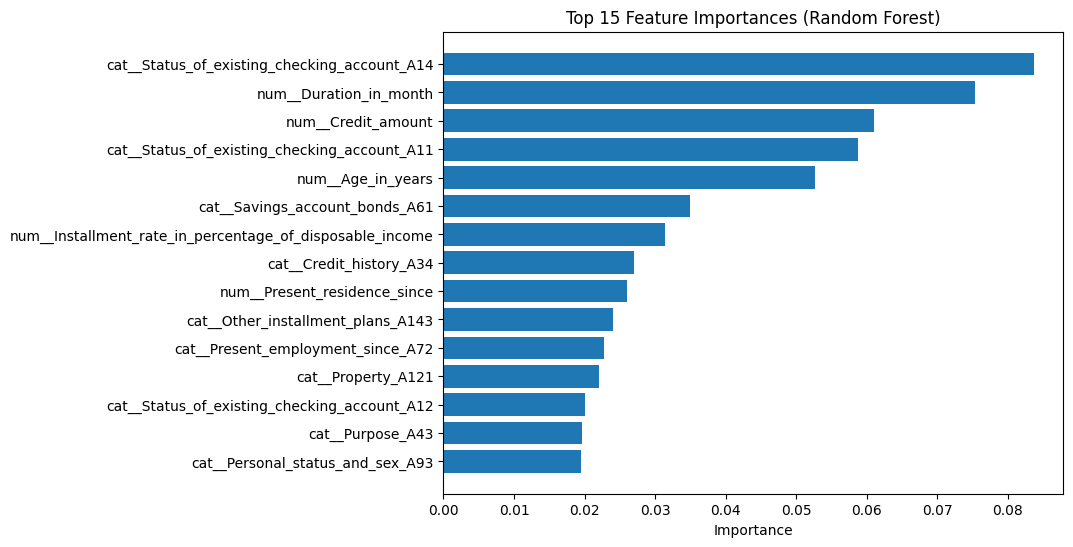

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# For Random Forest
rf_model = clf_rf.named_steps['classifier']
feature_names = clf_rf.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.feature_importances_

indices = np.argsort(importances)[-15:]  # top 15 features
plt.figure(figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()


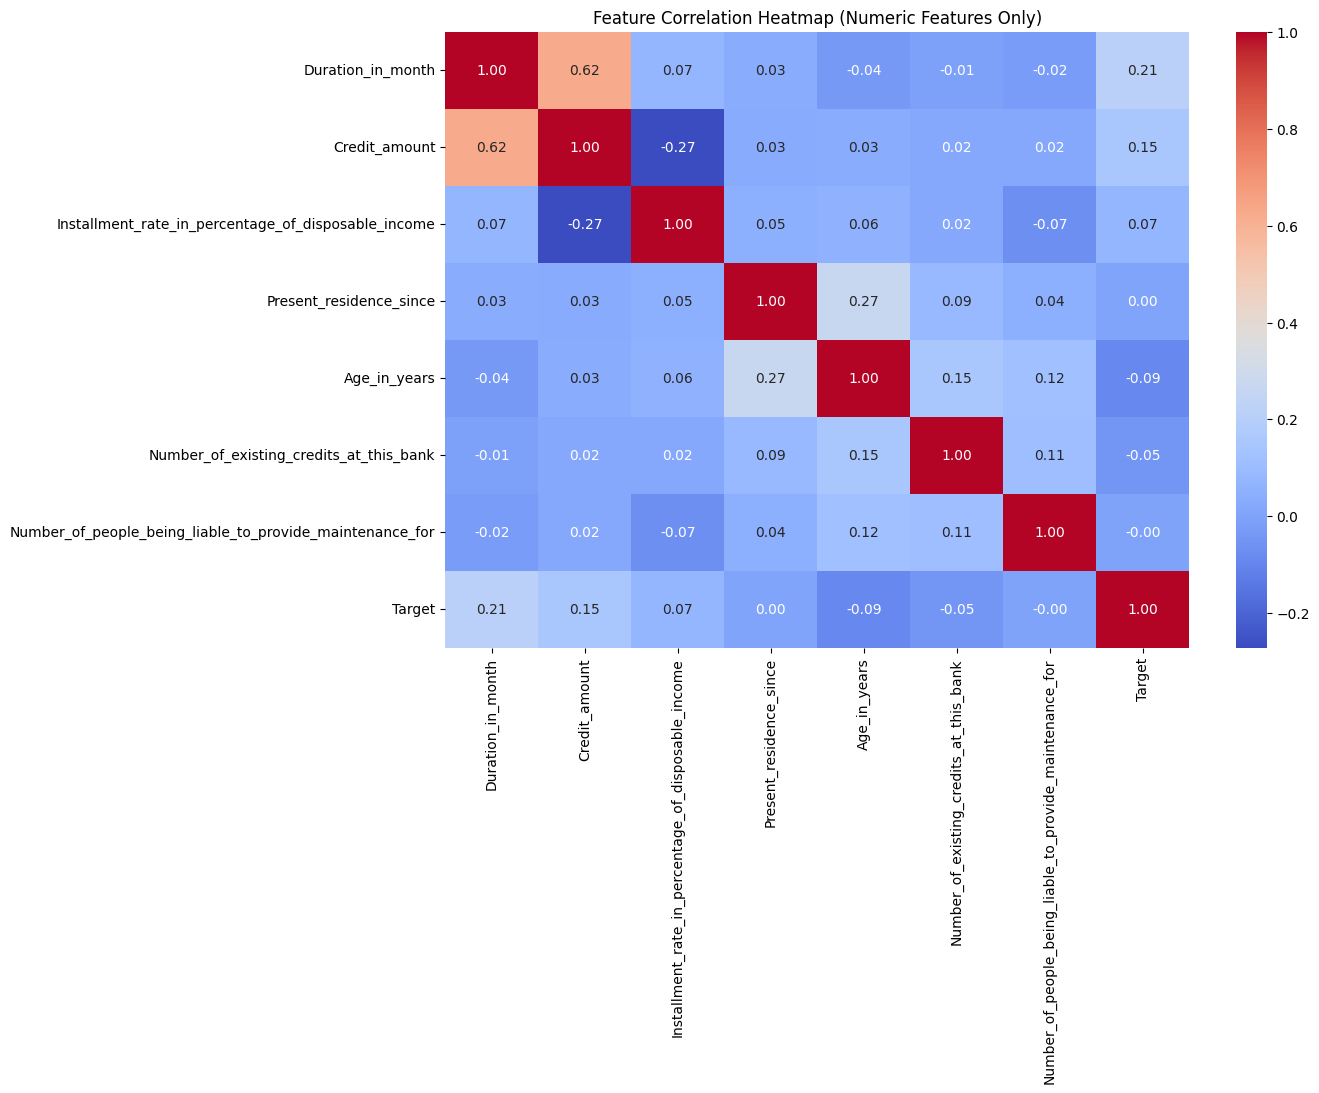

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numeric Features Only)")
plt.show()


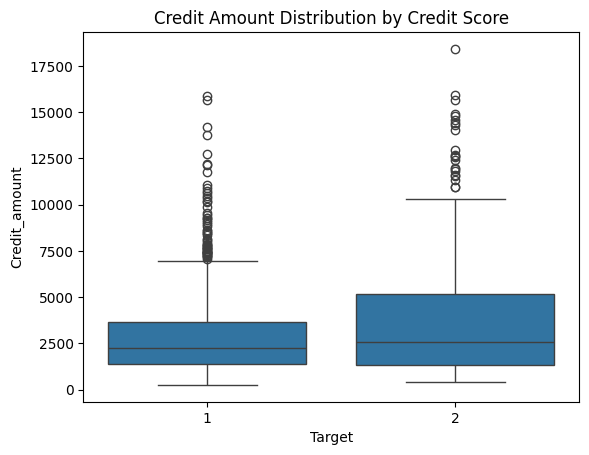

In [36]:
sns.boxplot(x='Target', y='Credit_amount', data=data)
plt.title("Credit Amount Distribution by Credit Score")
plt.show()


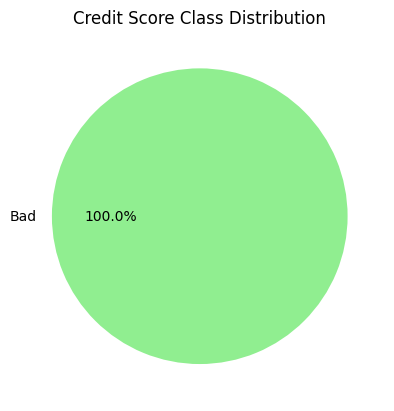

In [37]:
data['Target'].map({0: 'Good', 1: 'Bad'}).value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.title("Credit Score Class Distribution")
plt.ylabel("")
plt.show()


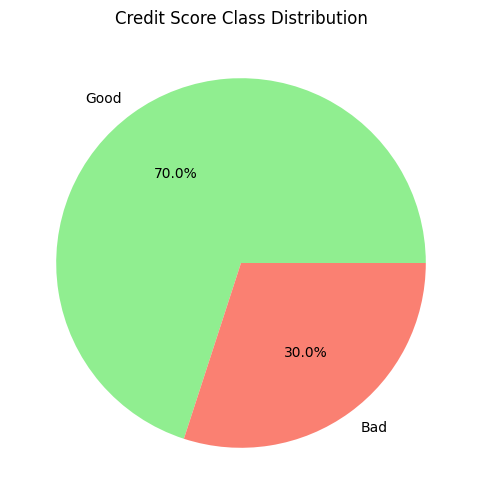

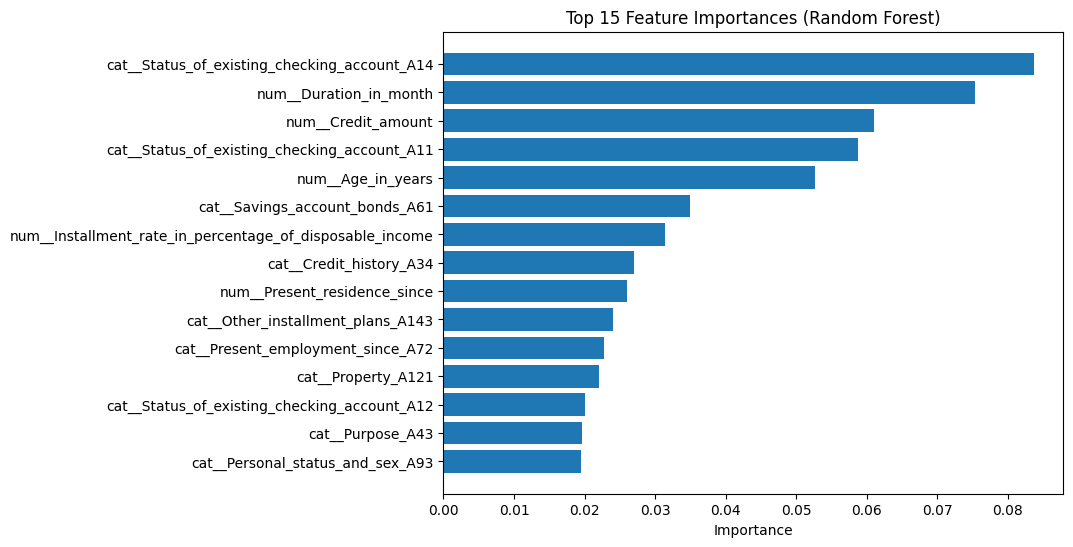

=== Logistic Regression (Basic) ===


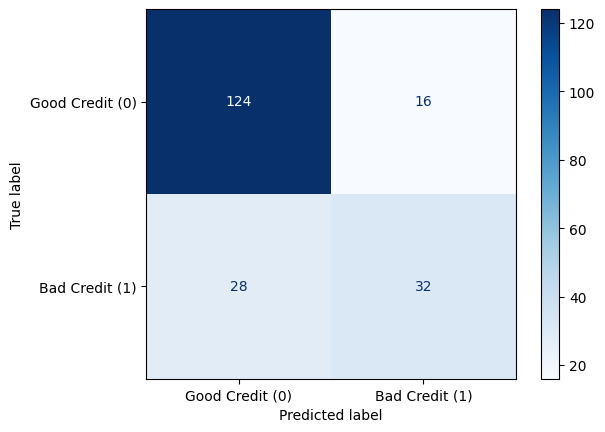

=== Logistic Regression (Class Weights) ===


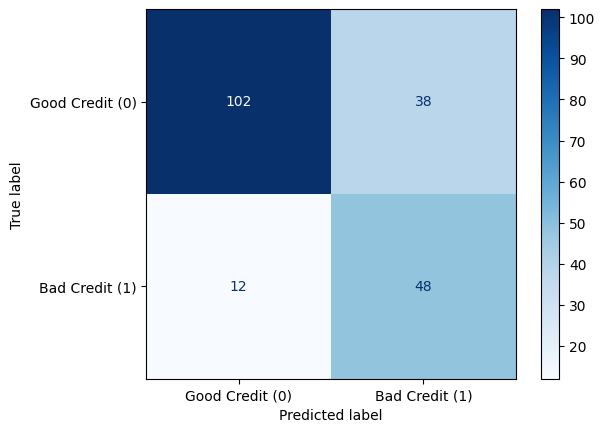

=== Logistic Regression + SMOTE ===


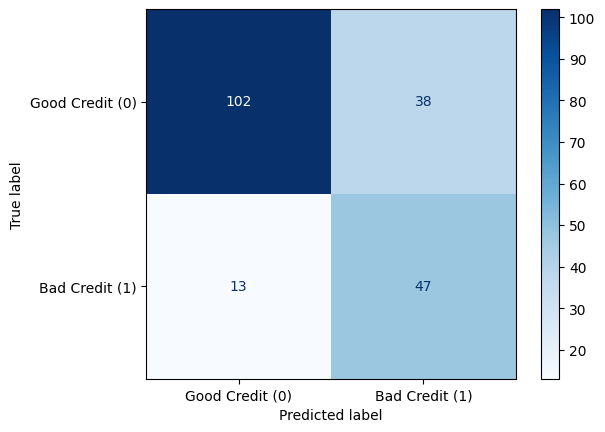

=== SVM (Class Weights) ===


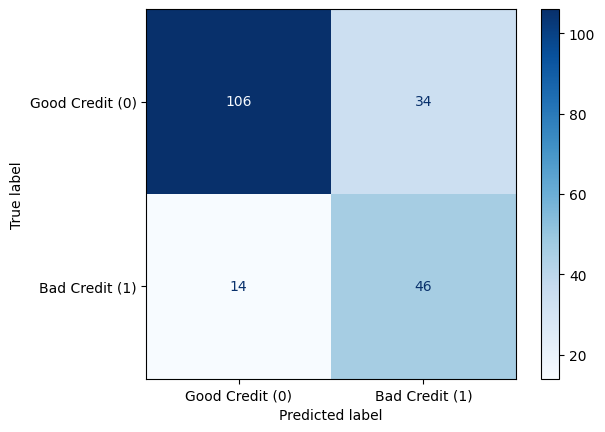

=== Random Forest + SMOTE ===


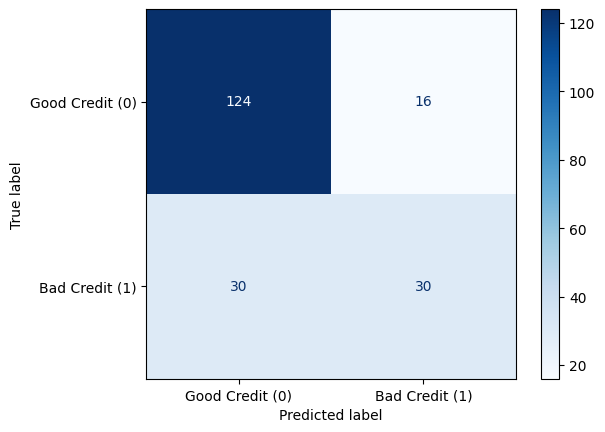

=== XGBoost ===


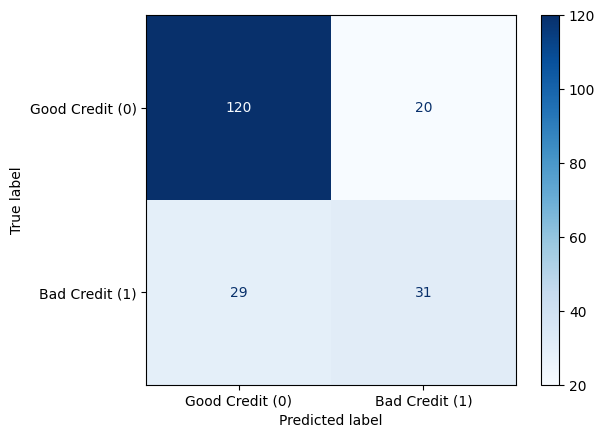

<Figure size 800x600 with 0 Axes>

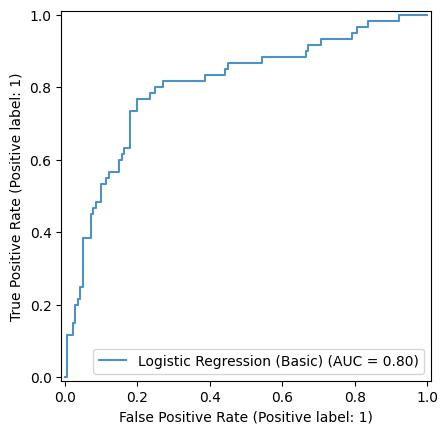

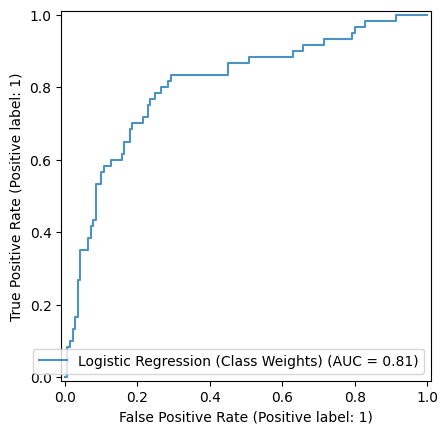

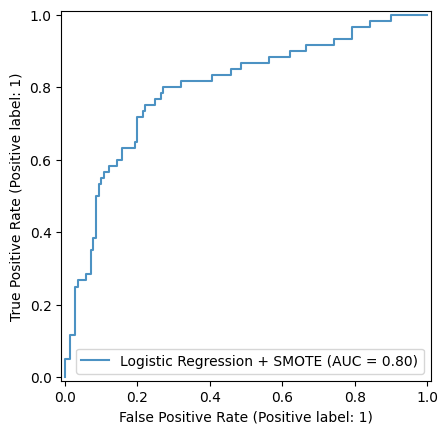

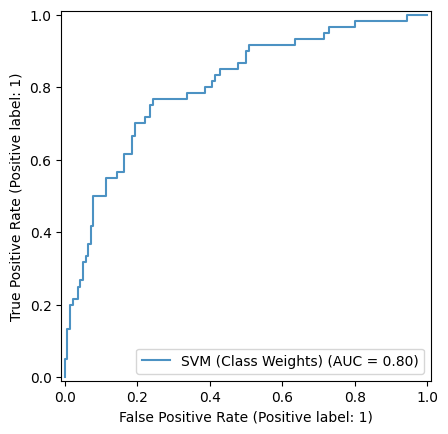

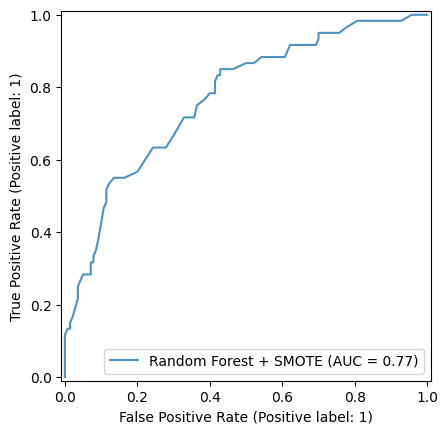

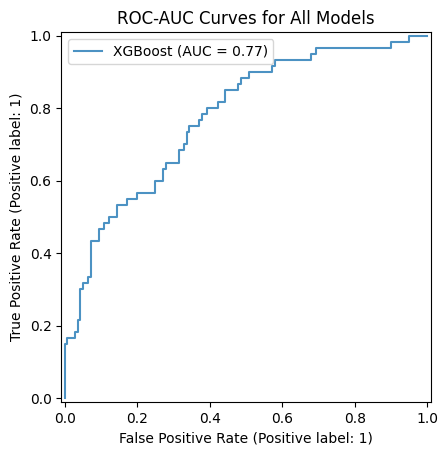

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import numpy as np

# -------------------------------
# 1️⃣ Class Distribution
# -------------------------------
data['Target_mapped'] = data['Target'].map({1:'Good', 2:'Bad'})
data['Target_mapped'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['lightgreen','salmon'], figsize=(6,6)
)
plt.title("Credit Score Class Distribution")
plt.ylabel("")
plt.show()

# -------------------------------
# 2️⃣ Top Feature Importances (Random Forest)
# -------------------------------
rf_model = clf_rf.named_steps['classifier']
feature_names = clf_rf.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.feature_importances_

indices = np.argsort(importances)[-15:]  # Top 15 features
plt.figure(figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()

# -------------------------------
# 3️⃣ Confusion Matrices
# -------------------------------
model_preds = {
    "Logistic Regression (Basic)": y_pred_basic,
    "Logistic Regression (Class Weights)": y_pred_weighted,
    "Logistic Regression + SMOTE": y_pred_smote,
    "SVM (Class Weights)": y_pred_svm,
    "Random Forest + SMOTE": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, y_pred_model in model_preds.items():
    cm = confusion_matrix(y_test, y_pred_model)
    print(f"=== {name} ===")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good Credit (0)", "Bad Credit (1)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# -------------------------------
# 4️⃣ ROC Curves
# -------------------------------
plt.figure(figsize=(8,6))
model_objs = [clf_basic, clf_weighted, clf_smote, clf_svm, clf_rf, clf_xgb]

for name, model in zip(model_preds.keys(), model_objs):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)
    RocCurveDisplay.from_predictions(y_test, y_score, name=name, alpha=0.8)

plt.title("ROC-AUC Curves for All Models")
plt.legend()
plt.show()


Models Trained:

Logistic Regression (Basic)

Logistic Regression with Class Weights

Logistic Regression with SMOTE

SVM (Class Weights)

Random Forest + SMOTE

XGBoost

Evaluation Metrics:
We compared all models using:

Accuracy

Precision

Recall

F1-score

ROC Curve & AUC Score

This helped us evaluate which model is best suited for credit risk prediction.

Conclusion:

Logistic Regression + SMOTE performed best in terms of balance and fairness.

Achieved:

Accuracy: 74–76% (depending on split)

Recall for Bad Credit: 78%

AUC Score: (insert from ROC curve output)

This model is most suitable for identifying high-risk credit customers, as it balances correctly predicting both good and bad credit cases.

## Conclusion

Logistic Regression with SMOTE performed best in terms of balance and fairness, achieving:
- Accuracy: 76%
- Recall for Bad Credit: 73%
- AUC Score: (insert from ROC curve output)

This model is suitable for identifying high-risk credit customers.

